In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 

In [2]:
cal=fetch_california_housing()
df=pd.DataFrame(cal.data,columns=cal.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
df['Price']=cal.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

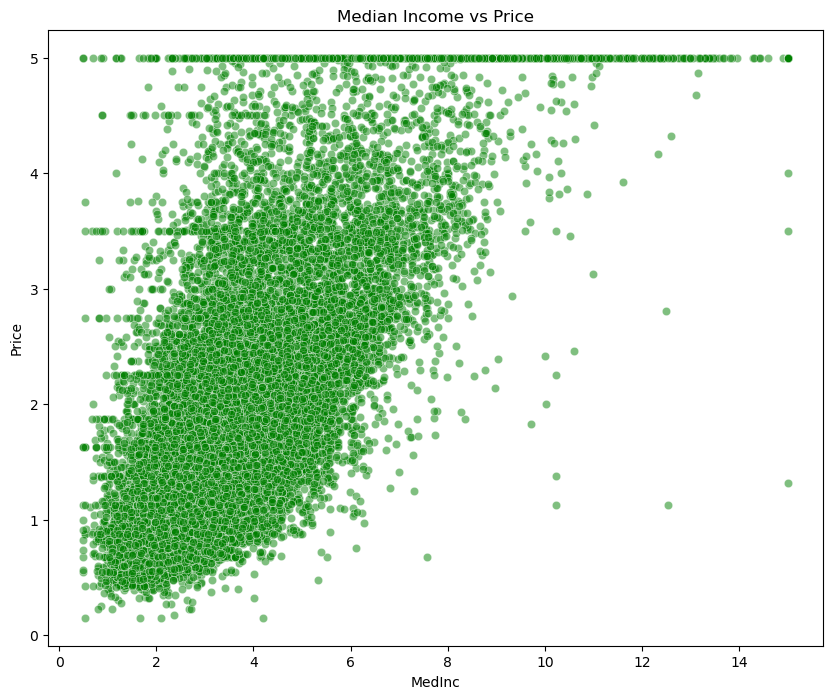

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MedInc',y='Price',data=df,color='green',alpha=0.5 )
plt.title("Median Income vs Price")
plt.show()

In [29]:
corr=df.corr() 
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [30]:
df.corr()['Price'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64

<Axes: >

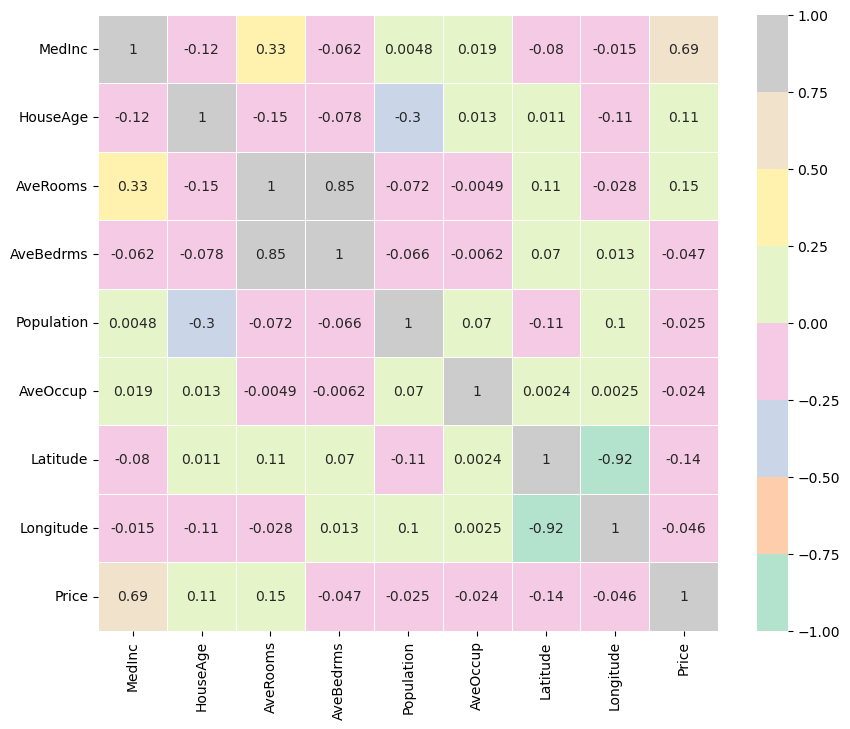

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='Pastel2',vmin=-1,vmax=1,linewidth=0.5)

In [44]:
#Prepare Data
x=df[['MedInc']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f'Linear Equation: Price={model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}')

Linear Equation: Price=0.42 * MedInc + 0.44


In [49]:
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f"MSE :{mse:.2f}")
mae=mean_absolute_error(y_test,y_pred)
print(f"MAE :{mae:.2f}")
rmse=np.sqrt(mse)
print(f"RMSE :{rmse:.2f}")
r2=r2_score(y_test,y_pred)
print(f"R2 Score  :{r2:.2f}")

MSE :0.71
MAE :0.63
RMSE :0.84
R2 Score  :0.46


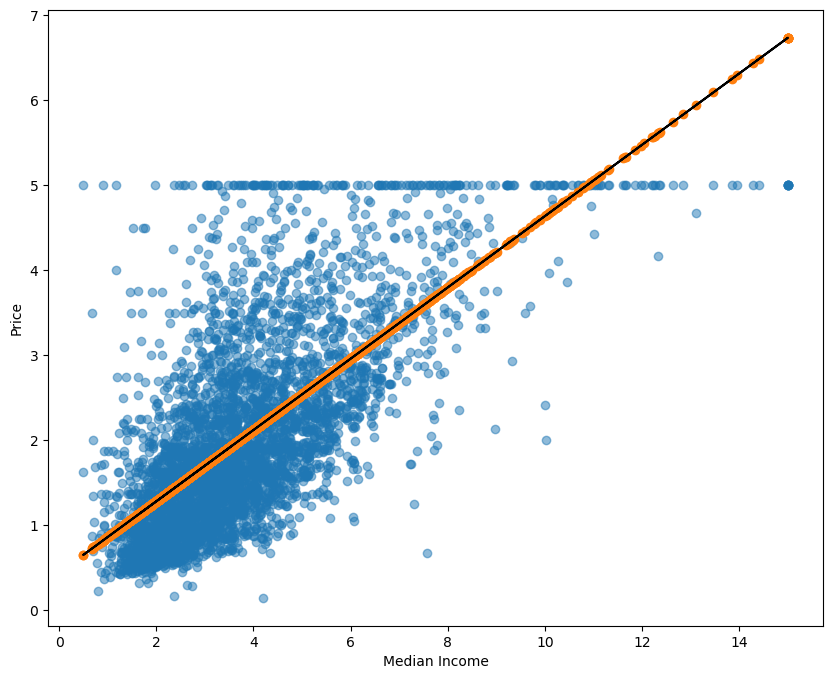

In [53]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(x_test,y_test,alpha=0.5)
scatter = plt.scatter(x_test,y_pred)
graph = plt.plot(x_test,y_pred , color='black')
plt.xlabel('Median Income')
plt.ylabel('Price')
plt.show(graph)

In [55]:
x1=df.drop('Price',axis=1)
y1=df['Price']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

#Linear Regression
model1=LinearRegression()
model1.fit(x1_train,y1_train)
print(f'Linear Equation: Price={model1.coef_[0]:.2f} * MedInc + {model1.intercept_:.2f}')

y1_pred=model1.predict(x1_test)
mse1=mean_squared_error(y1_test,y1_pred)
print(f"MSE :{mse1:.2f}")
mae1=mean_absolute_error(y1_test,y1_pred)
print(f"MAE :{mae1:.2f}")
rmse1=np.sqrt(mse1)
print(f"RMSE :{rmse1:.2f}")
r21=r2_score(y1_test,y1_pred)
print(f"R2 Score  :{r21:.2f}")

Linear Equation: Price=0.45 * MedInc + -37.02
MSE :0.56
MAE :0.53
RMSE :0.75
R2 Score  :0.58


In [57]:
residuals=y1_test-y1_pred
print(pd.DataFrame({'Actual': y1_test[:5],'Predicted':y1_pred[:5],'Residual':residuals[:5]}))

        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


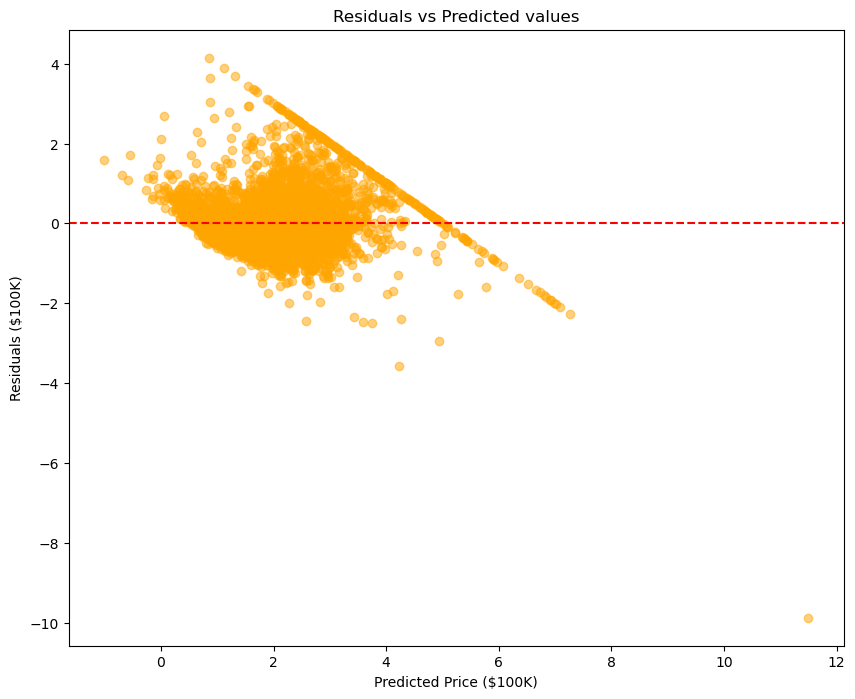

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(y1_pred,residuals,color='orange' ,alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')

plt.xlabel("Predicted Price ($100K)")
plt.ylabel("Residuals ($100K)")
plt.title("Residuals vs Predicted values")
plt.show()

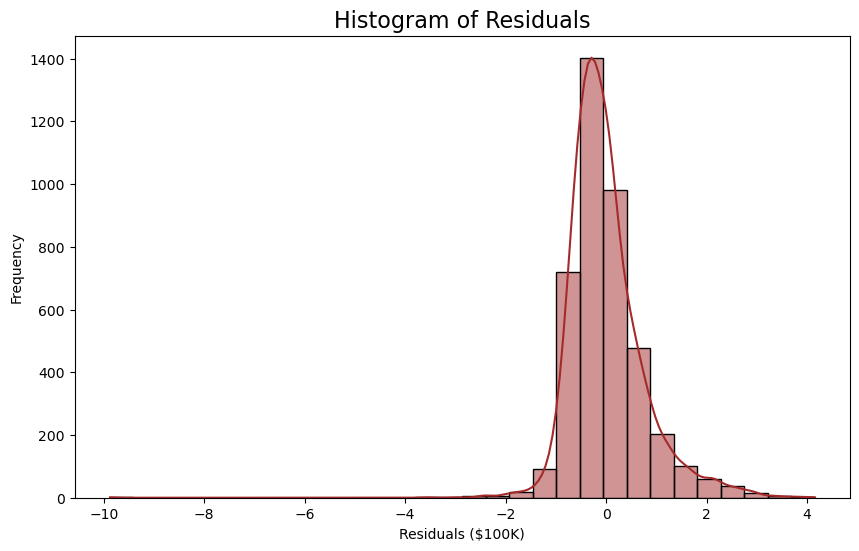

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='brown')
plt.xlabel("Residuals ($100K)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals",fontsize=16)
plt.show()

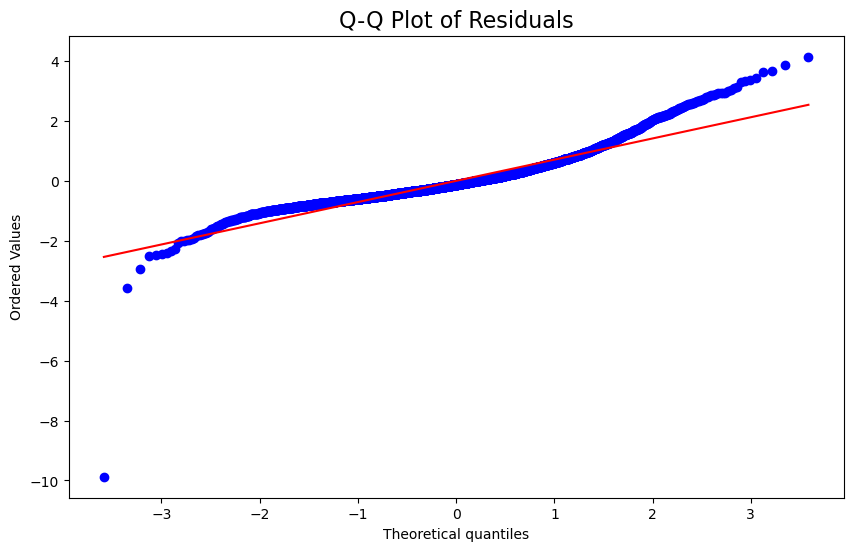

In [71]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

# K-Fold Cross-Validation
1.Split the dataset into K equal-sized folds

2.Train the model on K-1 folds and test on the remaining fold

3.Repeat the process K times each timeuse a diffrenet fold as test set

4.computes average performnace across all K iterations

In [75]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=2,noise=20)
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()
scores=cross_val_score(model,X,y,cv=kf,scoring='r2')
print("Cross-validation scores",scores)
print("Avg SCores",scores.mean())


Cross-validation scores [0.90778142 0.78974911 0.88945781 0.80994482 0.83909627]
Avg SCores 0.8472058873036683


In [86]:
x1=df.drop('Price',axis=1)
y1=df['Price']
prices=cross_val_score(model,x1,y1,cv=kf,scoring='r2')
print(prices)
print("Average",prices.mean())

[0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Average 0.6013781013684618
